In [44]:
# Github link: https://github.com/PacktPublishing/Deep-Reinforcement-Learning-Hands-On-Third-Edition

import random
from typing import List

class Environment:
    def __init__(self):
        self.steps_left = 10

    def get_observation(self) -> List[float]:
        return [0.0, 0.0, 0.0]

    def get_actions(self) -> List[int]:
        return [0, 1]

    def is_done(self) -> bool:
        return self.steps_left == 0

    def action(self, action: int) -> float:
        if self.is_done():
            raise Exception("Game is over")
        self.steps_left -= 1
        return random.random()

class Agent:
    def __init__(self):
        self.total_reward = 0.0

    def step(self, env: Environment):
        current_obs = env.get_observation()
        actions = env.get_actions()
        reward = env.action(random.choice(actions))
        self.total_reward += reward

if __name__ == "__main__":
    env = Environment()
    agent = Agent()
    while not env.is_done():
        agent.step(env)


    print("Total reward got: %.4f" % agent.total_reward)

Total reward got: 6.5503


In [45]:
! pip install gymnasium matplotlib imageio pillow
! pip install moviepy numpy opencv-python torch torchvision pytorch-ignite tensorboard mypy ptan stable-baselines3 torchrl ray[tune] pytest
! pip install gymnasium[other]
! pip install gymnasium[atari] gymnasium[classic-control] 

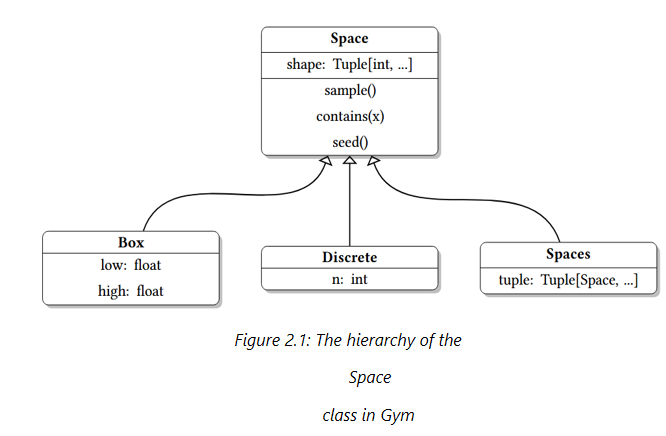

In [46]:
import gymnasium as gym
from gymnasium.spaces import Discrete

# Define a discrete observation space with 5 possible states
observation_space = Discrete(5)

# Check if a value is within the space
print("Contains 0:", observation_space.contains(0))
print("Contains 1:", observation_space.contains(1))
print("Contains 2:", observation_space.contains(2))
print("Contains 3:", observation_space.contains(3))
print("Contains 4:", observation_space.contains(4))
print("Contains 5:", observation_space.contains(5))
print("Contains 6:", observation_space.contains(6))


# Sample an observation from the space
observation = observation_space.sample()
print("Discrete Observation:", observation)

Contains 0: True
Contains 1: True
Contains 2: True
Contains 3: True
Contains 4: True
Contains 5: False
Contains 6: False
Discrete Observation: 0


In [47]:
from gymnasium.spaces import Box
import numpy as np

# Define a box observation space for an RGB image
observation_space = Box(low=0, high=255, shape=(210, 160, 3), dtype=np.uint8)

# Sample an observation from the space
observation = observation_space.sample()
print("Box Observation Shape:", observation.shape)
print("Box Observation :", observation)

# Check if a specific array is within the space
test_observation = np.zeros((210, 160, 3), dtype=np.uint8)
print("Contains Test Observation:", observation_space.contains(test_observation))


Box Observation Shape: (210, 160, 3)
Box Observation : [[[206 122 113]
  [128  83  83]
  [ 84 128  20]
  ...
  [242  80 141]
  [ 94 205  97]
  [ 92 156 110]]

 [[ 78 191   1]
  [ 85 232  37]
  [ 57 178   9]
  ...
  [167 248 160]
  [241 228 245]
  [ 97 105  67]]

 [[255 232 181]
  [110 244 249]
  [  7 193 117]
  ...
  [  0  27  59]
  [133  82 253]
  [229  83 168]]

 ...

 [[205 170 228]
  [ 63 161  93]
  [179  32   0]
  ...
  [  8  26 183]
  [161   0  24]
  [ 65 113  55]]

 [[224  23 104]
  [247 196  59]
  [145  86 136]
  ...
  [185 132 100]
  [252 212  94]
  [181  48 177]]

 [[ 33 158 216]
  [163 147 204]
  [ 44 213 168]
  ...
  [238 161 106]
  [195  89  28]
  [116 175  14]]]
Contains Test Observation: True


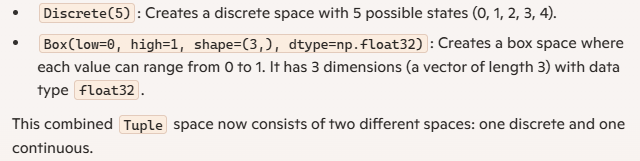

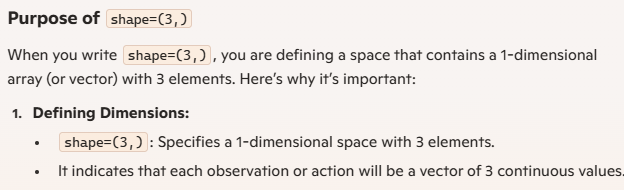

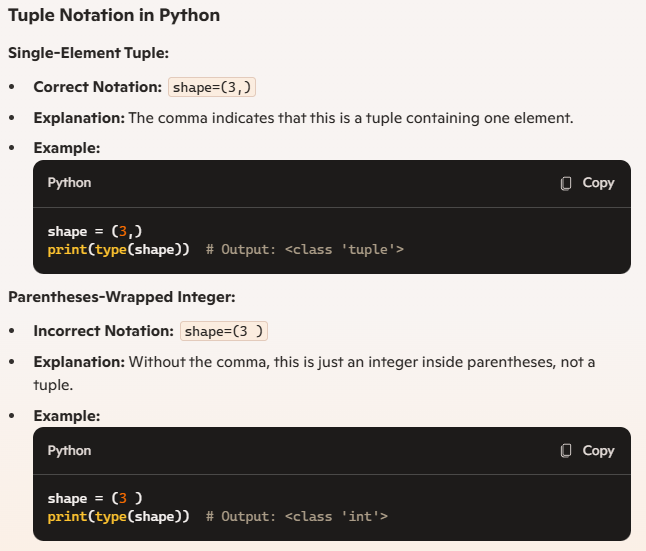

In [48]:
from gymnasium.spaces import Tuple

# Define a tuple observation space combining discrete and box spaces
observation_space = Tuple((
    Discrete(5),  # Discrete space with 5 possible states --> 0 to 4
    Box(low=0, high=1, shape=(3,), dtype=np.float32)  # Box space with continuous values
))

# Sample an observation from the space
observation = observation_space.sample()
print("Tuple Observation:", observation)

# Sample an observation from the space
observation = observation_space.sample()
print("Tuple Observation:", observation)

# Sample an observation from the space
observation = observation_space.sample()
print("Tuple Observation:", observation)

# Sample an observation from the space
observation = observation_space.sample()
print("Tuple Observation:", observation)

# Check if a specific tuple is within the space
test_observation = (2, np.array([0.1, 0.55, 0.9], dtype=np.float32))
print("\n\nContains Test Observation:", observation_space.contains(test_observation))


Tuple Observation: (4, array([0.03043752, 0.58345926, 0.08762379], dtype=float32))
Tuple Observation: (0, array([0.6474139 , 0.87316686, 0.47947946], dtype=float32))
Tuple Observation: (2, array([0.8422262 , 0.3553851 , 0.54620105], dtype=float32))
Tuple Observation: (0, array([0.9543001 , 0.9777555 , 0.23377839], dtype=float32))


Contains Test Observation: True


In [49]:
from gymnasium.spaces import Dict

# Define a dict observation space
observation_space = Dict({
    'position': Box(low=0, high=1, shape=(3,), dtype=np.float32),
    'velocity': Box(low=-1, high=1, shape=(3,), dtype=np.float32),
    'status': Discrete(2)  # Boolean status
})

# Sample an observation from the space
observation = observation_space.sample()
print("Dict Observation:", observation)

# Check if a specific dictionary is within the space
test_observation = {
    'position': np.array([0.1, 0.5, 0.9], dtype=np.float32),
    'velocity': np.array([0.0, -0.5, 0.5], dtype=np.float32),
    'status': 1
}
print("Contains Test Observation:", observation_space.contains(test_observation))


Dict Observation: {'position': array([0.41543403, 0.15196234, 0.24665953], dtype=float32), 'status': 0, 'velocity': array([0.79526395, 0.36124444, 0.02775442], dtype=float32)}
Contains Test Observation: True


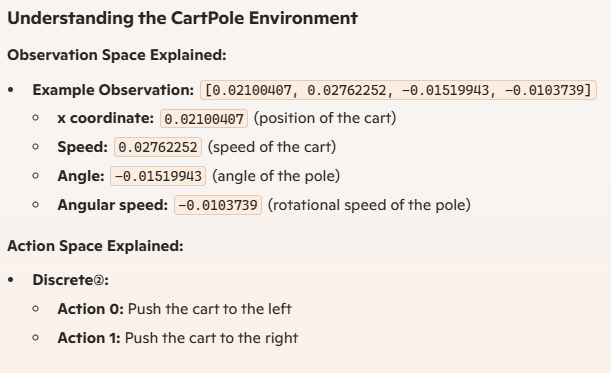

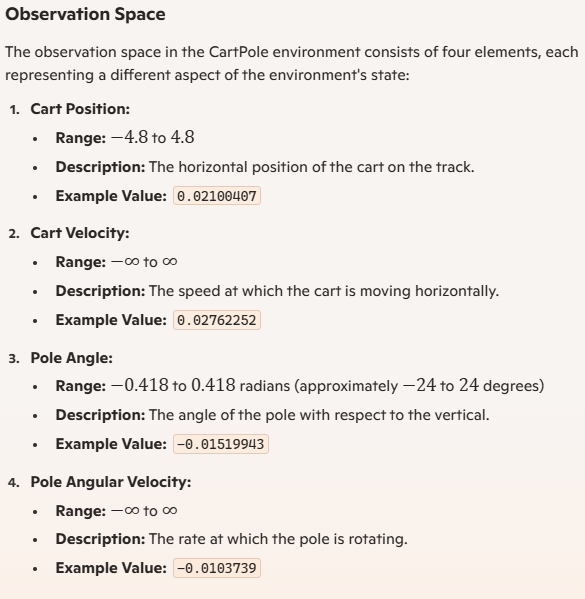

Action Space: Discrete(2)
Observation Space: Box([-4.8               -inf -0.41887903        -inf], [4.8               inf 0.41887903        inf], (4,), float32)


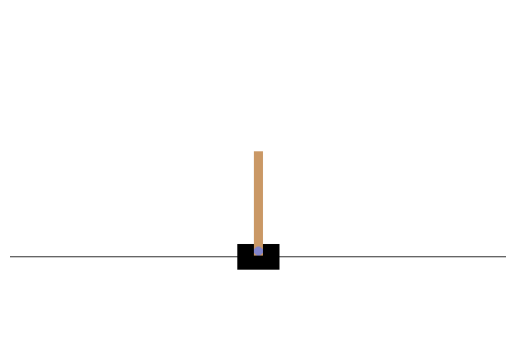

In [50]:
import gymnasium as gym
import matplotlib.pyplot as plt
from IPython.display import display
from PIL import Image

# Helper function to display images inline in Colab
def show_image(img):
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Create the CartPole environment
env = gym.make('CartPole-v1', render_mode="rgb_array") # Specify render_mode

# Reset the environment to start a new episode
initial_observation, info = env.reset()

# Print the initial observation and additional info
# Check the action space
print("Action Space:", env.action_space)  # Output: Discrete(2)

# Check the observation space
print("Observation Space:", env.observation_space)  # Output: Box(4, float32)

# Render the initial state and display it
img = env.render()
# Check if img is not None before proceeding
if img is not None:
    img = Image.fromarray(img)
    show_image(img)
else:
    print("Rendering is not supported or not properly configured.")

Step 1:
Action: 1
Observation: [ 0.00596822  0.19005755 -0.00060841 -0.31745887]
Reward: 1.0
Done: False
Truncated: False
Info: {}


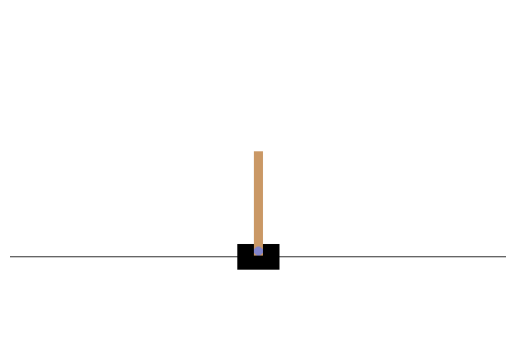

Step 2:
Action: 1
Observation: [ 0.00976938  0.38518816 -0.00695759 -0.6103336 ]
Reward: 1.0
Done: False
Truncated: False
Info: {}


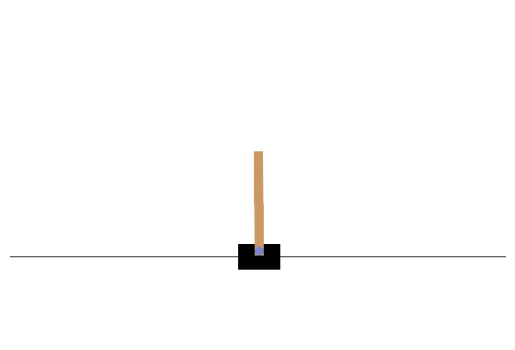

Step 3:
Action: 0
Observation: [ 0.01747314  0.19016415 -0.01916426 -0.3198502 ]
Reward: 1.0
Done: False
Truncated: False
Info: {}


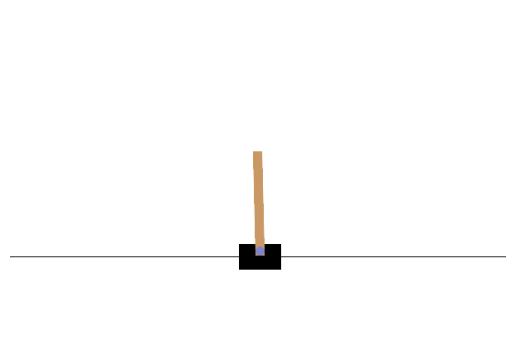

Step 4:
Action: 0
Observation: [ 0.02127642 -0.00467971 -0.02556127 -0.03327203]
Reward: 1.0
Done: False
Truncated: False
Info: {}


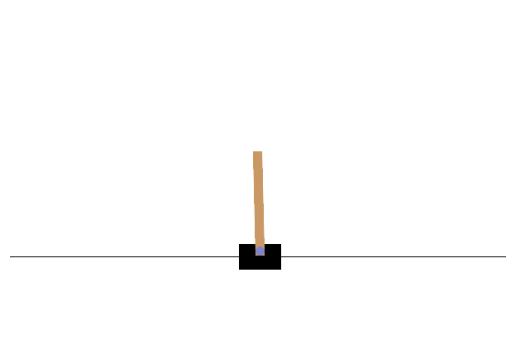

Step 5:
Action: 0
Observation: [ 0.02118283 -0.19942595 -0.02622671  0.25123772]
Reward: 1.0
Done: False
Truncated: False
Info: {}


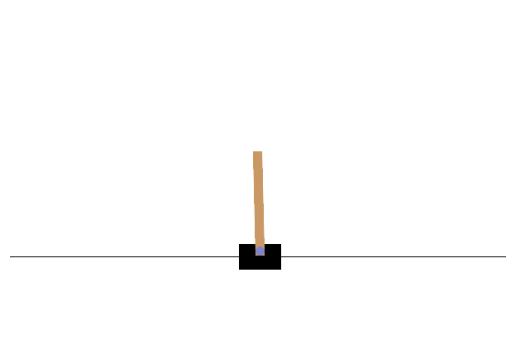

In [51]:
# Number of steps to simulate
num_steps = 5

for step in range(num_steps):
    # Take a random action
    action = env.action_space.sample()

    # Apply the action in the environment
    observation, reward, done, truncated, info = env.step(action)

    # Print the results of the action
    print(f"Step {step + 1}:")
    print("Action:", action)
    print("Observation:", observation)
    print("Reward:", reward)
    print("Done:", done)
    print("Truncated:", truncated)
    print("Info:", info)

    # Render each step and display it
    img = env.render()
    img = Image.fromarray(img)
    show_image(img)

    # Check if the episode has ended
    if done or truncated:
        print("Episode finished after {} steps".format(step + 1))
        break


In [52]:
import gymnasium as gym

if __name__ == "__main__":
    env = gym.make("CartPole-v1")
    total_reward = 0.0
    total_steps = 0
    obs, _ = env.reset()

    while True:
        action = env.action_space.sample()
        obs, reward, is_done, is_trunc, _ = env.step(action)
        total_reward += reward
        total_steps += 1
        if is_done:
            break

    print("Episode done in %d steps, total reward %.2f" % (total_steps, total_reward))

Episode done in 14 steps, total reward 14.00


In [53]:
class Env:
    def step(self, action):
        print(f"Performing action {action}")
        return "state", "reward", "done", "info"
    
    def reset(self):
        print("Environment reset")
        return "initial_state"

class Wrapper:
    def __init__(self, env):
        self.env = env
    
    def step(self, action):
        print("Wrapper step called")
        return self.env.step(action)
    
    def reset(self):
        print("Wrapper reset called")
        return self.env.reset()

# Using the Wrapper
env = Env()
wrapped_env = Wrapper(env)

print(wrapped_env.step("action"))
print(wrapped_env.reset())


Wrapper step called
Performing action action
('state', 'reward', 'done', 'info')
Wrapper reset called
Environment reset
initial_state


In [54]:
import gymnasium as gym
import random

class RandomActionWrapper(gym.ActionWrapper):
    def __init__(self, env: gym.Env, epsilon: float = 0.1):
        super(RandomActionWrapper, self).__init__(env)
        self.epsilon = epsilon

    def action(self, action: gym.core.WrapperActType) -> gym.core.WrapperActType:
        if random.random() < self.epsilon:
            action = self.env.action_space.sample()
            print(f"Random action {action}")
        return action

if __name__ == "__main__":
    env = RandomActionWrapper(gym.make("CartPole-v1"))
    obs = env.reset()
    total_reward = 0.0

    while True:
        obs, reward, done, _, _ = env.step(0)
        total_reward += reward
        if done:
            break
    print(f"Reward got: {total_reward:.2f}")


Random action 1
Reward got: 10.00


In [55]:
if __name__ == "__main__":
    env = gym.make("CartPole-v1", render_mode="rgb_array")
    env = gym.wrappers.HumanRendering(env)


In [ ]:
if __name__ == "__main__":
    env = gym.make("CartPole-v1", render_mode="rgb_array")
    env = gym.wrappers.RecordVideo(env, video_folder="video")


d:\python\Lib\site-packages\gymnasium\wrappers\rendering.py:283: UserWarning: WARN: Overwriting existing videos at d:\CODING_STUFF\RL_learning\video folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(
